<a href="https://colab.research.google.com/github/hayleypc/BPCA_HFF/blob/main/BPCA_analysis_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages(c('data.table','ggplot2','magrittr','rstatix','plotrix','ggsignif',"googledrive",'openxlsx'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘Rcpp’




In [4]:
library(data.table)
library(ggplot2)
library(magrittr)
library(rstatix)
library(ggsignif)
library(plotrix)
library(googledrive)
library(openxlsx)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [5]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=bf481dc2501a8c4e362c857eb8d19670&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbGlDeXl0UjVLQzhYMWY2Zl8xd1RMYkJ6d1Zoa1cyd1p4NGI3bDRaV0dBMDBhbHdheFpzSDNEay0yS21TaGs1QSIsInN0YXRlIjoiYmY0ODFkYzI1MDFhOGM0ZTM2MmM4NTdlYjhkMTk2NzAifQ==


In [7]:

# https://drive.google.com/file/d/1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv/view?usp=drive_link
drive_download(file = as_id('1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv'), path = '/content/firehistory_region_intersect.gpkg', overwrite = TRUE)

File downloaded:

• firehistory_region_intersect.gpkg <id: 1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv>

Saved locally as:

• /content/firehistory_region_intersect.gpkg



In [8]:
# Coarse Woody Debris
# https://drive.google.com/file/d/1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0/view?usp=drive_link
drive_download(file = as_id('1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0'), path = '/content/cwd_rate_table.csv', overwrite = TRUE)

File downloaded:

• cwd_rate_table.csv <id: 1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0>

Saved locally as:

• /content/cwd_rate_table.csv



In [23]:
# LF fractionation
file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'full_bpca_exp_dt.csv']$id

drive_download(file = as_id(file_id), path = '/content/full_bpca_exp_dt.csv', overwrite = TRUE)

File downloaded:

• full_bpca_exp_dt.csv <id: 1664xblDUK5yG4zzhhXXomgwK-wR6p31b>

Saved locally as:

• /content/full_bpca_exp_dt.csv



In [10]:
# BPCA Standards
file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'standards.csv']$id

drive_download(file = as_id(file_id), path = '/content/standards.csv', overwrite = TRUE)

File downloaded:

• standards.csv <id: 1zNR-qpUKPnO6OpArQYuuweoMG505F7pw>

Saved locally as:

• /content/standards.csv



In [178]:
# Site level data
#https://drive.google.com/file/d/1jl5hrmDSY_4Fw6C7y0tXifYITMI7EzIh/view?usp=drive_link

file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == '2023_01_07_HFF_site_level.csv']$id

drive_download(file = as_id(file_id), path = '/content/2023_01_07_HFF_site_level.csv', overwrite = TRUE)

File downloaded:

• 2023_01_07_HFF_site_level.csv <id: 1jl5hrmDSY_4Fw6C7y0tXifYITMI7EzIh>

Saved locally as:

• /content/2023_01_07_HFF_site_level.csv



In [179]:
# Bulk Density

#https://drive.google.com/file/d/1qc7PMNOWeV-XAByKg157Ztvtnxj_7D35/view?usp=drive_link

file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'HFF_soil_Db.csv']$id

drive_download(file = as_id(file_id), path = '/content/HFF_soil_Db.csv', overwrite = TRUE)

File downloaded:

• HFF_soil_Db.csv <id: 1qc7PMNOWeV-XAByKg157Ztvtnxj_7D35>

Saved locally as:

• /content/HFF_soil_Db.csv



In [346]:
cwd_rate_table <- fread('/content/cwd_rate_table.csv')

In [347]:
full_bpca_exp_dt <- fread('/content/full_bpca_exp_dt.csv')

In [348]:
sites_dt <- fread('/content/2023_01_07_HFF_site_level.csv')

In [349]:
stocks_dt <- fread('/content/HFF_soil_Db.csv')

In [350]:
full_bpca_exp_dt$V1 <- NULL

In [351]:
cwd_rate_table$V1 <- NULL
names(cwd_rate_table)[1] <- 'SITE'

In [352]:
full_bpca_exp_dt <- merge(full_bpca_exp_dt,stocks_dt[,c('SITE','DEPTH','BULKD')],by=c('SITE','DEPTH'))

In [354]:
full_bpca_exp_dt <- merge(full_bpca_exp_dt,cwd_rate_table,by=c('SITE'))

In [355]:
full_bpca_exp_dt$FRACTION <- full_bpca_exp_dt$FRACTION  %>% factor(levels = c('LF','HF','BULK'))
full_bpca_exp_dt$DEPTH <- full_bpca_exp_dt$DEPTH  %>% factor(levels = c('0-5','5-10','10-20','20-30'))
full_bpca_exp_dt$BURN_SEVERITY <- full_bpca_exp_dt$BURN_SEVERITY  %>% factor(levels = c('control','low','moderate','high'))

In [373]:
full_bpca_exp_dt %>% names

[1] "SITE"                           "DEPTH"                         
 [3] "FRACTION"                       "BURN_SEVERITY"                 
 [5] "TREATMENT"                      "DEPTH_UPPER"                   
 [7] "DEPTH_LOWER"                    "CONC_240"                      
 [9] "CONC_216"                       "CONC_MEAN"                     
[11] "PEARSONS"                       "FRACTIONATION_MASS_RECOVERED_G"
[13] "STARTING_FRACT_MASS_SOIL_G"     "MASS_PROPORTION_RECOVERED"     
[15] "RECOVERY"                       "C_PERC"                        
[17] "N_PERC"                         "ACCEPT"                        
[19] "BPCA_STARTING_MASS_MG"          "BULKD"                         
[21] "decayed_mass_kg"                "total_input"                   
[23] "burn_decayed_mass_kg"           "wood_input_rate"               
[25] "wood_departure_rate"            "wood_accumulation_rate"        
[27] "years_to_capacity"              "years_to_recovery"             
[29] "mg_ml_bpca"                     "g_kg_bpca_lf"                  
[31] "per_bpca_carb_lf"               "C_N"                           
[33] "carbon_stock"                   "exp_group"

In [357]:
full_bpca_exp_dt$DEPTH_UPPER  <- full_bpca_exp_dt$DEPTH %>% paste0 %>% strsplit('-') %>% lapply(function(x){x[1]}) %>% unlist %>% as.numeric
full_bpca_exp_dt$DEPTH_LOWER  <- full_bpca_exp_dt$DEPTH %>% paste0 %>% strsplit('-') %>% lapply(function(x){x[2]}) %>% unlist %>% as.numeric
full_bpca_exp_dt[,mg_ml_bpca := (CONC_MEAN/BPCA_STARTING_MASS_MG) ]
full_bpca_exp_dt[,g_kg_bpca_lf := MASS_PROPORTION_RECOVERED*mg_ml_bpca,by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,per_bpca_carb_lf := mg_ml_bpca/(C_PERC/100),by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,C_N := C_PERC/N_PERC,by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,carbon_stock:= (DEPTH_LOWER %>% as.numeric - DEPTH_UPPER%>% as.numeric )*((BULKD %>% as.numeric ))*(C_PERC/100)*100]
full_bpca_exp_dt[BURN_SEVERITY!='control',TREATMENT := 'treatment']
full_bpca_exp_dt[BURN_SEVERITY=='control',TREATMENT := 'control']
full_bpca_exp_dt[ ,TREATMENT := 'control']
full_bpca_exp_dt[,exp_group:= SITE %>% gsub('C','',.) %>% substr(1,1)]

In [375]:
analysis_full_bpca_exp_dt <-
full_bpca_exp_dt[ACCEPT =='T' &!is.na(DEPTH),list(
  CONC_MEAN=mean(CONC_MEAN,na.rm=T),
  C_PERC=mean(C_PERC,na.rm=T),
  N_PERC=mean(N_PERC,na.rm=T),
  C_N = mean(C_N,na.rm=T),
  mg_ml_bpca=mean(mg_ml_bpca,na.rm=T),
  g_kg_bpca_lf=mean(g_kg_bpca_lf,na.rm=T),
  per_bpca_carb_lf = mean(per_bpca_carb_lf,na.rm=T),
  carbon_stock = mean(carbon_stock,na.rm=T),
  MASS_PROPORTION_RECOVERED=mean(MASS_PROPORTION_RECOVERED,na.rm=T),
  decayed_mass_kg = mean(decayed_mass_kg,na.rm=T),
  total_input = mean(total_input,na.rm=T),
  burn_decayed_mass_kg = mean(burn_decayed_mass_kg,na.rm=T),
  wood_input_rate = mean(wood_input_rate,na.rm=T),
  wood_departure_rate = mean(wood_departure_rate,na.rm=T),
  wood_accumulation_rate = mean(wood_accumulation_rate,na.rm=T),
  years_to_capacity = mean(years_to_capacity,na.rm=T),
  years_to_recovery = mean(years_to_recovery,na.rm=T)
  # 'decayed_mass_kg''total_input''burn_decayed_mass_kg''wood_input_rate''wood_departure_rate''wood_accumulation_rate''years_to_capacity''years_to_recovery
  ),by=c('SITE','exp_group','FRACTION','DEPTH','BURN_SEVERITY','TREATMENT','DEPTH_UPPER','DEPTH_LOWER')]

In [376]:
names(analysis_full_bpca_exp_dt)

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "per_bpca_carb_lf"          "carbon_stock"             
[17] "MASS_PROPORTION_RECOVERED" "decayed_mass_kg"          
[19] "total_input"               "burn_decayed_mass_kg"     
[21] "wood_input_rate"           "wood_departure_rate"      
[23] "wood_accumulation_rate"    "years_to_capacity"        
[25] "years_to_recovery"

In [360]:
t_tests_fractions_dt <-
c('HF','LF','BULK') %>%
lapply(function(frac){
# ,'CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf'
c('C_N','C_PERC','N_PERC','carbon_stock') %>%
lapply(function(variable){
c('H','M','L') %>%
lapply(function(group){
control_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY=='control'][FRACTION == frac]
exp_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY!='control'][FRACTION == frac]


exp_dt$DEPTH %>% levels %>%
lapply(function(y){

# if( (length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2) &
#     (length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) ){
      # print((length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2))
      # print((length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) )
      # print(frac)
      # print(variable)
t_result <- t.test(control_dt[FRACTION == frac][DEPTH==y][[variable]] ,exp_dt[FRACTION == frac][DEPTH==y][[variable]] )
data.table(fraction=frac,
          variable=variable,
          burn_severity = unique(exp_dt$burn_severity),
          depth=y,p=t_result$p.value,
          control_m = mean(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_sd = sd(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_n = length(control_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_m = mean(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_sd = sd(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_n = length(exp_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_group = group
          )
# }else(return(NULL))
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist

In [361]:
t_tests_bpca_dt <-
c( 'LF') %>%
lapply(function(frac){
# ,'CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf'
c('CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf') %>%
lapply(function(variable){
c('H','M','L') %>%
lapply(function(group){
control_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY=='control'][FRACTION == frac]
exp_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY!='control'][FRACTION == frac]


exp_dt$DEPTH %>% levels %>%
lapply(function(y){

# if( (length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2) &
#     (length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) ){
      # print((length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2))
      # print((length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) )
      # print(frac)
      # print(variable)
t_result <- t.test(control_dt[FRACTION == frac][DEPTH==y][[variable]] ,exp_dt[FRACTION == frac][DEPTH==y][[variable]] )
data.table(fraction=frac,
          variable=variable,
          burn_severity = unique(exp_dt$burn_severity),
          depth=y,p=t_result$p.value,
          control_m = mean(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_sd = sd(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_n = length(control_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_m = mean(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_sd = sd(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_n = length(exp_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_group = group
          )
# }else(return(NULL))
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist

In [380]:
t_tests_dwd_dt <-
c('BULK') %>%
lapply(function(frac){
# ,'CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf'
c('decayed_mass_kg','total_input','burn_decayed_mass_kg','wood_input_rate','wood_departure_rate','wood_accumulation_rate','years_to_capacity','years_to_recovery') %>%
lapply(function(variable){
c('H','M','L') %>%
lapply(function(group){
control_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY=='control'][FRACTION == frac]
exp_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY!='control'][FRACTION == frac]


(exp_dt$DEPTH %>% levels)[1] %>%
lapply(function(y){

# if( (length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2) &
#     (length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) ){
      # print((length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2))
      # print((length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) )
      # print(frac)
      # print(variable)
t_result <- t.test(control_dt[FRACTION == frac][DEPTH==y][[variable]] ,exp_dt[FRACTION == frac][DEPTH==y][[variable]] )
data.table(fraction=frac,
          variable=variable,
          burn_severity = unique(exp_dt$burn_severity),
          depth=y,p=t_result$p.value,
          control_m = mean(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_sd = sd(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_n = length(control_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_m = mean(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_sd = sd(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_n = length(exp_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_group = group
          )
# }else(return(NULL))
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist

In [382]:
t_tests_dwd_dt

fraction,variable,depth,p,control_m,control_sd,control_n,exp_m,exp_sd,exp_n,exp_group
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>
BULK,total_input,0-5,0.03147256,17.2744723,9.6389385,5,3.6549369,5.40115652,5,L
BULK,wood_input_rate,0-5,0.03496690,0.6526469,0.3166049,5,0.2052226,0.21883326,5,L
BULK,burn_decayed_mass_kg,0-5,0.03505987,7.9907489,5.1173596,5,0.9037810,0.94237035,5,L
BULK,years_to_recovery,0-5,0.03588031,0.0000000,0.0000000,5,19.1400956,13.76266569,5,H
BULK,wood_accumulation_rate,0-5,0.03893278,0.3782011,0.1735129,5,0.1374881,0.12555380,5,L
BULK,wood_departure_rate,0-5,0.03978186,0.2744458,0.1543035,5,0.0677345,0.09523897,5,L
BULK,years_to_recovery,0-5,0.04403296,0.4231477,0.9250462,5,9.9710665,7.39246188,5,M
BULK,years_to_recovery,0-5,0.06012672,0.0000000,0.0000000,5,5.6457076,4.85777773,5,L
BULK,decayed_mass_kg,0-5,0.06293637,7.9907489,5.1173596,5,2.0677433,2.89063439,5,L


In [383]:
t_tests_dt <- rbindlist(list(t_tests_fractions_dt,t_tests_bpca_dt,t_tests_dwd_dt))

In [385]:
# t_tests_dt[fraction =='BULK'][order(p)]

In [364]:
t_tests_dt$variable %>% unique

[1] "C_N"              "C_PERC"           "N_PERC"           "carbon_stock"    
[5] "CONC_MEAN"        "mg_ml_bpca"       "g_kg_bpca_lf"     "per_bpca_carb_lf"

In [386]:
t_tests_dt[,exp_m_norm := exp_m/control_m]

t_tests_dt[fraction!='BULK' & variable=='C_N'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction!='BULK' &variable=='C_PERC'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction!='BULK' &variable=='N_PERC'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction!='BULK' &variable=='carbon_stock'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='CONC_MEAN'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='mg_ml_bpca'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='g_kg_bpca_lf'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='per_bpca_carb_lf'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

            Df Sum Sq Mean Sq F value Pr(>F)  
exp_group    2 0.4807  0.2403   2.766 0.0912 .
depth        3 0.3352  0.1117   1.286 0.3113  
fraction     1 0.0620  0.0620   0.713 0.4100  
Residuals   17 1.4773  0.0869                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.1459 0.07295   2.519  0.110
depth        3 0.1071 0.03571   1.233  0.328
fraction     1 0.0016 0.00161   0.055  0.817
Residuals   17 0.4923 0.02896               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.0577 0.02883   1.122  0.349
depth        3 0.0949 0.03164   1.232  0.329
fraction     1 0.0000 0.00003   0.001  0.973
Residuals   17 0.4367 0.02569               

            Df  Sum Sq Mean Sq F value Pr(>F)  
exp_group    2 0.10069 0.05035   2.842 0.0861 .
depth        3 0.01157 0.00386   0.218 0.8828  
fraction     1 0.00009 0.00009   0.005 0.9445  
Residuals   17 0.30111 0.01771                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.2985 0.14927   1.995  0.217
depth        3 0.0693 0.02311   0.309  0.819
Residuals    6 0.4489 0.07481               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.3996 0.19981   2.812  0.138
depth        3 0.0986 0.03287   0.463  0.719
Residuals    6 0.4264 0.07106               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.0341 0.01706   0.181  0.838
depth        3 0.2079 0.06931   0.737  0.567
Residuals    6 0.5642 0.09403               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.0711 0.03556   0.659  0.551
depth        3 0.1126 0.03752   0.695  0.588
Residuals    6 0.3239 0.05398               

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


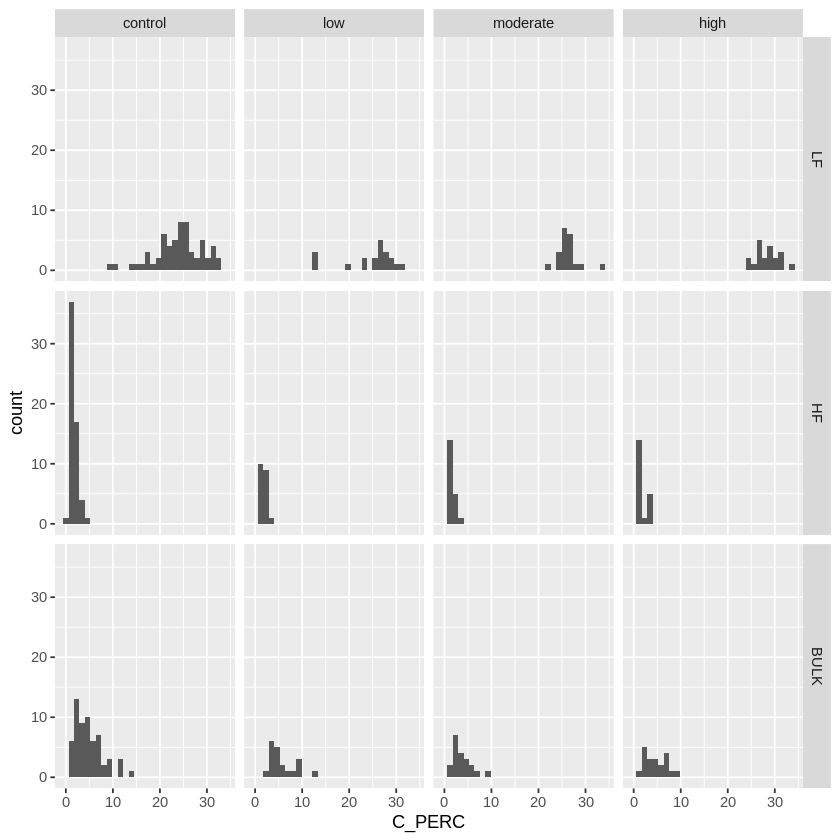

In [366]:
analysis_full_bpca_exp_dt%>%
  ggplot(aes(x=C_PERC))+
    geom_histogram()+
    facet_grid(FRACTION~BURN_SEVERITY)

Warning message:
“Removed 247 rows containing non-finite values (`stat_boxplot()`).”


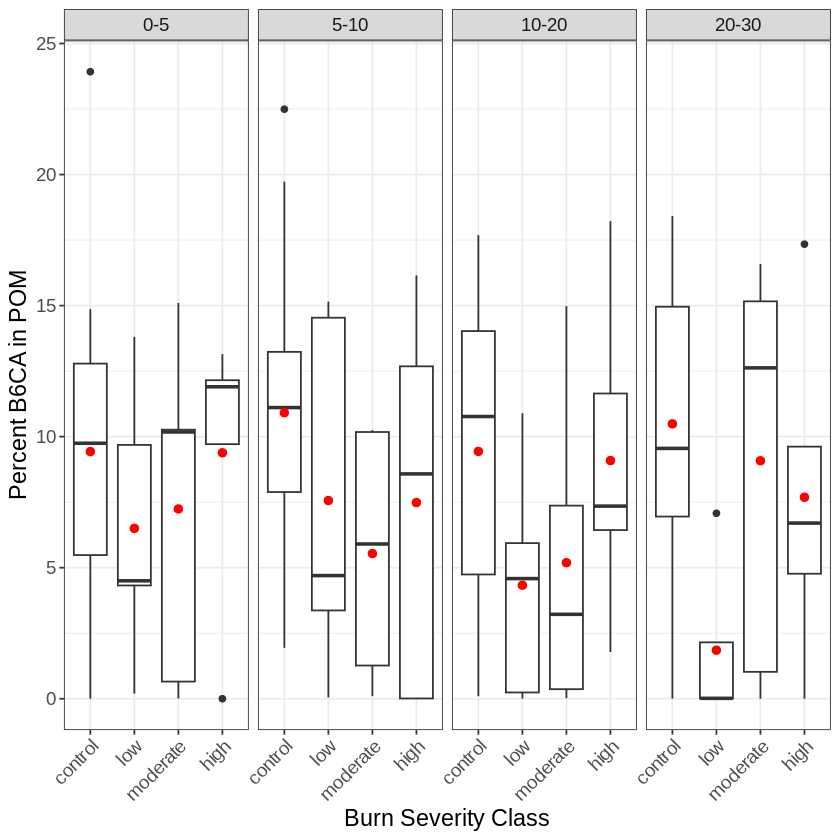

In [367]:
means_data <- analysis_full_bpca_exp_dt[ ,
                          .(CONC_MEAN = mean(CONC_MEAN, na.rm = TRUE)*100),
                          by = .(BURN_SEVERITY, DEPTH)]

analysis_full_bpca_exp_dt %>%
ggplot(  aes(x = BURN_SEVERITY, y = CONC_MEAN*100)) +
  geom_boxplot() +
  geom_point(data = means_data, aes(y = CONC_MEAN), color = "red", size = 2) +
  facet_grid(. ~ DEPTH) +
  ylab('Percent B6CA in POM') +
  xlab('Burn Severity Class') +
  theme_bw()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1), text = element_text(size = 14))


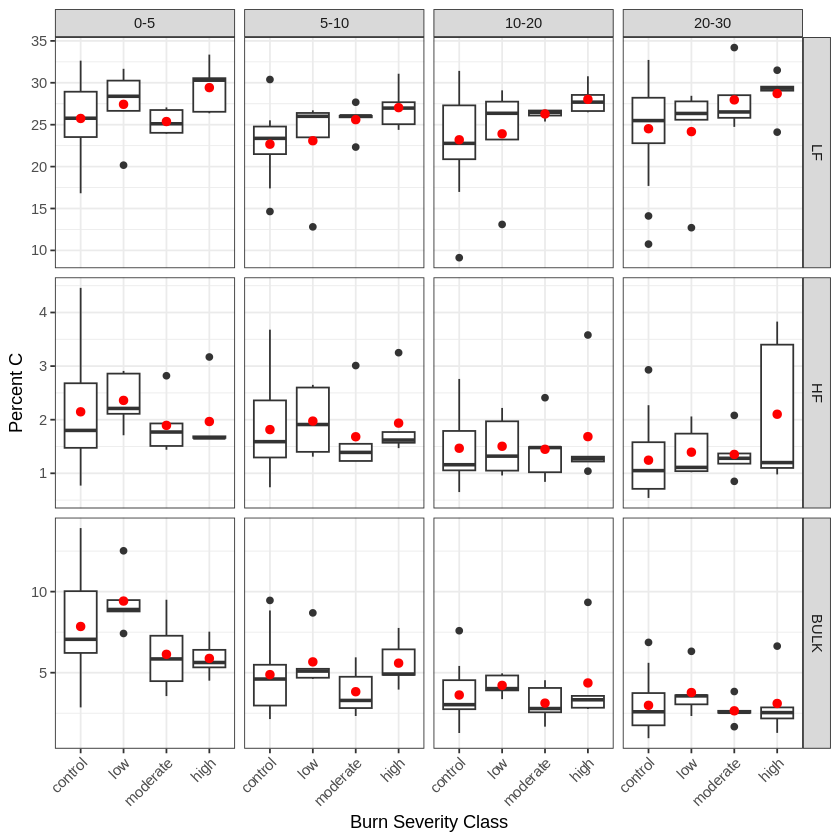

In [368]:
means_data <- analysis_full_bpca_exp_dt[ ,
                          .(C_PERC = mean(C_PERC, na.rm = TRUE)),
                          by = .(BURN_SEVERITY,FRACTION, DEPTH)]

analysis_full_bpca_exp_dt %>%
ggplot( aes(x = BURN_SEVERITY, y = C_PERC)) +
    geom_boxplot( ) +
    geom_point(data = means_data, aes(y = C_PERC), color = "red", size = 2) +
    ylab('Percent C') +
    # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
    #         map_signif_level=TRUE,step_increase=.05) +
    theme_bw()+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))+
    facet_grid(FRACTION~DEPTH,scales = 'free_y')

Warning message:
“Removed 247 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 247 rows containing non-finite values (`stat_signif()`).”


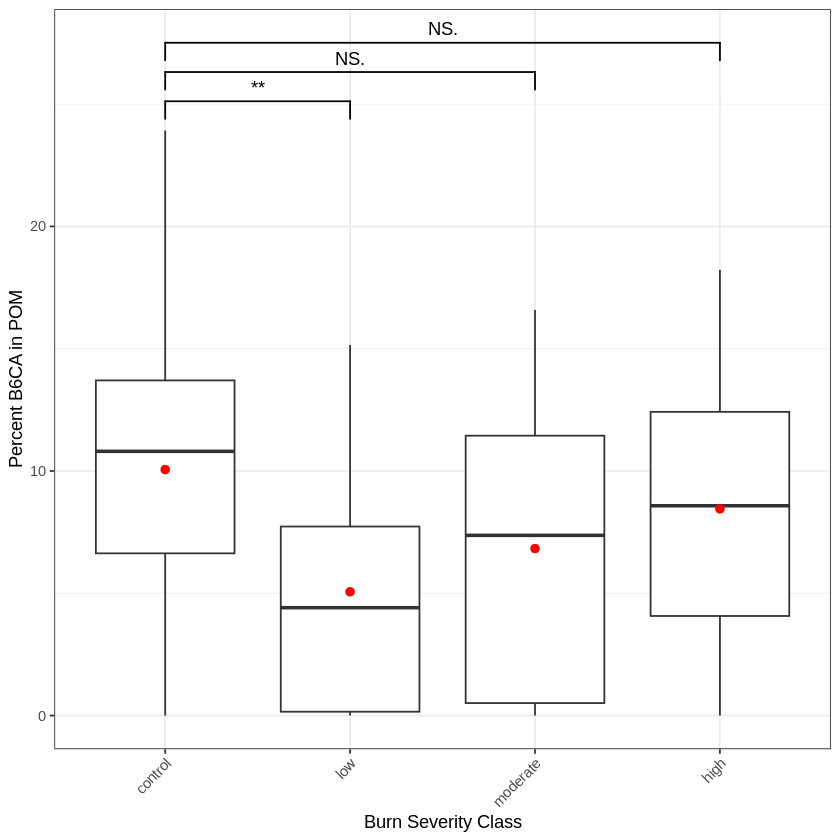

In [369]:
means_data <- analysis_full_bpca_exp_dt[ ,
                          .(CONC_MEAN = mean(CONC_MEAN, na.rm = TRUE)*100),
                          by = .(BURN_SEVERITY)]

analysis_full_bpca_exp_dt %>%
ggplot( aes(x = BURN_SEVERITY, y = CONC_MEAN*100)) +
    geom_boxplot( ) +
    geom_point(data = means_data, aes(y = CONC_MEAN), color = "red", size = 2) +
    ylab('Percent B6CA in POM') +
    geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
    theme_bw()+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))

In [370]:


LF_stoic_dt[!is.na(Depth)][,list(conc_avg = mean(conc_avg,na.rm=T)),by=.(site,burn_severity)] %>%
ggplot(aes(y=conc_avg,x=burn_severity))+
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
    geom_boxplot(aes(group=burn_severity))
    # facet_wrap(.~.)

ERROR: Error in eval(expr, envir, enclos): object 'LF_stoic_dt' not found


In [ ]:
# (conc_240/bpca_starting_mass_mg)*(fractionation_mass_recovered_g/starting_fract_mass_soil_g)*(C/100)
LF_stoic_dt[,g_kg := (conc_avg/bpca_starting_mass_mg) ]
LF_stoic_dt[,g_kg := mass_proportion_recovered/conc_avg,by=1:nrow(LF_stoic_dt)]
LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),list(g_kg=mean(g_kg,na.rm = T)),by=.(burn_severity,site)] %>%
ggplot(aes(x = burn_severity, y = g_kg)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
  # facet_grid(.~Depth) +
  coord_cartesian(expand=TRUE)

In [ ]:

LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),list(g_kg=mean(g_kg,na.rm = T)),by=.(burn_severity,site,Depth)] %>%
aov(g_kg ~ burn_severity, data = .) %>%
summary()

In [ ]:
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][fraction !='BULK'][C_perc/N_perc <100] %>%
ggplot(aes(x = burn_severity, y =C_N)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
  #           map_signif_level=TRUE,step_increase=.05) +
  facet_grid(fraction~Depth,scales = 'free_y') +
  coord_cartesian(expand=TRUE)

In [ ]:
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][fraction !='BULK'][C_perc/N_perc <100] %>%
ggplot(aes(x = burn_severity, y =C_N,group=burn_severity)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  #ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  ylab('') +
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
  #           map_signif_level=TRUE,step_increase=.05) +
  facet_grid(fraction~Depth,scales = 'free_y') +
  coord_cartesian(expand=TRUE)